In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('../Datasets/Titanic.csv')

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [4]:
from statsmodels.graphics.mosaicplot import mosaic

In [5]:
def colors(row):
    #print(row)
    survived, pclass, sex = row
    if(survived=='1'):
        if(pclass=='1'):
            if(sex=='male'):
                return {'color':'#e1f5fe'}
            if(sex=='female'):
                return {'color':'#b3e5fc'}
        elif(pclass=='2'):
            if(sex=='male'):
                return {'color':'#81d4fa'}
            if(sex=='female'):
                return {'color':'#4fc3f7'}
        else:
            if(sex=='male'):
                return {'color':'#29b6f6'}
            if(sex=='female'):
                return {'color':'#03a9f4'}
            
    else:
        if(pclass=='1'):
            if(sex=='male'):
                return {'color':'#ffe5e5'}
            if(sex=='female'):
                return {'color':'#ffcccc'}
        elif(pclass=='2'):
            if(sex=='male'):
                return {'color':'#ffb2b2'}
            if(sex=='female'):
                return {'color':'#ff9999'}
        else:
            if(sex=='male'):
                return {'color':'#ff7f7f'}
            if(sex=='female'):
                return {'color':'#ff6666'}
        

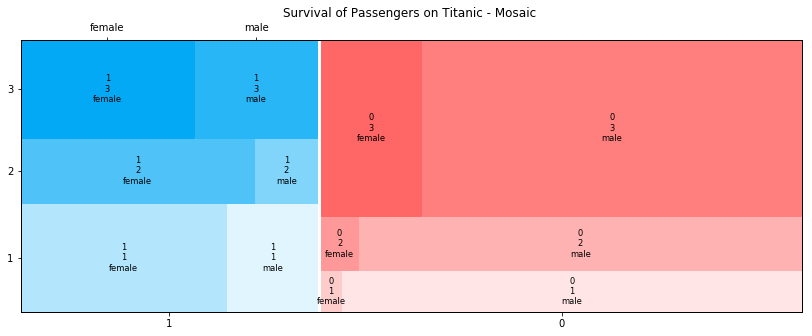

In [6]:
import matplotlib as mpl
from statsmodels.graphics.mosaicplot import mosaic
mpl.rc("figure", figsize=(14,5))
mosaic(df, ['survived', 'pclass', 'sex'], properties=colors, title='Survival of Passengers on Titanic - Mosaic ')
plt.show()